In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import cv2
import os, copy
import time
import imp

import OMRobjects as OMR
import util_functions as fs

imp.reload(OMR)
imp.reload(fs)

%matplotlib inline

In [2]:
sheet_path = './data/You_to_me_me_to_you'
sheets = [OMR.Sheet(os.path.join(sheet_path, page_path), order=i) for i, page_path in enumerate(sorted(os.listdir(sheet_path)))]

* Sheet Object Created :: Sheet #0 :: ./data/You_to_me_me_to_you/p1.png :: (1809, 1280)
* Sheet Object Created :: Sheet #1 :: ./data/You_to_me_me_to_you/p2.png :: (1809, 1280)
* Sheet Object Created :: Sheet #2 :: ./data/You_to_me_me_to_you/p3.png :: (1809, 1280)
* Sheet Object Created :: Sheet #3 :: ./data/You_to_me_me_to_you/p4.png :: (1809, 1280)


In [3]:
sheet_sample = 0

sheets[sheet_sample].preprocess_image(threshold=200)
sheets[sheet_sample].create_system(sheets[sheet_sample])

systems = sheets[sheet_sample].systems

>>> Preprocessing Page #00 :: ./data/You_to_me_me_to_you/p1.png
* Deskewing :: PASS
* Resizing :: PASS
* Denoising :: PASS
* Inverse binary thresholding :: threshold=200
>>> Extracting systems : 5 systems
* System Object Created :: System #0 of [...you/p1.png] :: (x, y, w, h) = (83, 188, 1136, 230)
* System Object Created :: System #1 of [...you/p1.png] :: (x, y, w, h) = (79, 479, 1140, 220)
* System Object Created :: System #2 of [...you/p1.png] :: (x, y, w, h) = (80, 773, 1139, 238)
* System Object Created :: System #3 of [...you/p1.png] :: (x, y, w, h) = (83, 1070, 1136, 259)
* System Object Created :: System #4 of [...you/p1.png] :: (x, y, w, h) = (83, 1382, 1137, 247)


In [4]:
system_sample = 0

systems[system_sample].get_pixel_histogram(depend_on='row')
systems[system_sample].get_pixel_histogram(depend_on='col', grid=[0.3, 0.5, 0.7, 0.9, 0.95])

hline_pos, hthickness = systems[system_sample].get_line_info(hist_by='row')
vline_pos, vthickness = systems[system_sample].get_line_info(hist_by='col')
vline_pos, vthickness = systems[system_sample].check_bar()

systems[system_sample].reset_line_removed_image()
systems[system_sample].remove_lines(hline_pos, hthickness, direction='hor')
systems[system_sample].remove_lines(vline_pos, vthickness, direction='ver')
systems[system_sample].clustering_staff()

measures = systems[system_sample].create_measure(systems[system_sample])

* StaffLines Object Created :: Staff Line Cluster #0 with 5 lines :: y = [56 67 78 89 99], average_interval = 11
* StaffLines Object Created :: Staff Line Cluster #1 with 5 lines :: y = [169 180 191 201 212], average_interval = 11
* Measure Object Created:: Measure #0 of System #0 of [...you/p1.png] :: (x, y, w, h) = [  0   0 352 230]
* Measure Object Created:: Measure #1 of System #0 of [...you/p1.png] :: (x, y, w, h) = [352   0 363 230]
* Measure Object Created:: Measure #2 of System #0 of [...you/p1.png] :: (x, y, w, h) = [715   0 419 230]


[[1 1 1]
 [1 1 1]
 [1 1 1]] uint8 uint8
[[1 1 1]
 [1 1 1]
 [1 1 1]] uint8 uint8
[[1 1 1]
 [1 1 1]
 [1 1 1]] uint8 uint8


error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/morph.simd.hpp:649: error: (-215:Assertion failed) _kernel.type() == CV_8U in function 'MorphFilter'


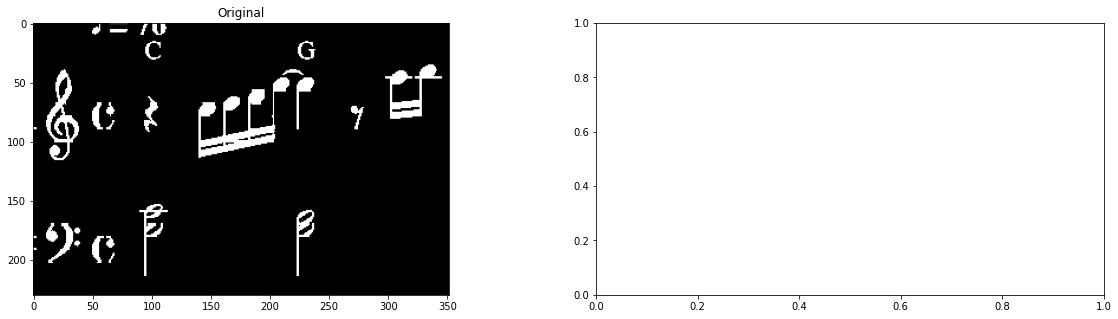

In [17]:
measure_sample = 0

num_erode_dilate = 3
k_size = (3, 3)


image_origin = measures[measure_sample].image_line_removed
image_ed = image_origin.copy()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
ax[0].imshow(image_origin, cmap='gray')
ax[0].set_title('Original')

for i in range(num_erode_dilate):
    k = cv2.getStructuringElement(cv2.MORPH_RECT, k_size)
    print(k, k.dtype, image_ed.dtype)
    image_ed = cv2.erode(np.array(image_ed), k)
for i in range(num_erode_dilate):
    k = cv2.getStructuringElement(cv2.MORPH_RECT, k_size)
    image_ed = cv2.dilate(image_ed, kernel_size)

ax[1].imshow(image_ed, cmap='gray')
ax[1].set_title(f'Erode & Dilate : {num_erode_dilate} times')

fig.tight_layout()
plt.show()